In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler


In [ ]:
# Fashion MNIST veri setini yükleme
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

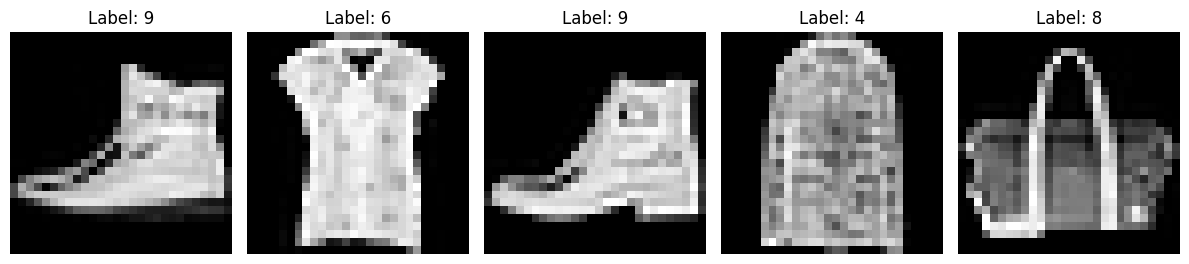

In [ ]:
# Rastgele birkaç örnek görüntüyü görselleştirme
fig, axes = plt.subplots(1, 5, figsize=(12, 8))
for i, ax in enumerate(axes.ravel()):
    idx = np.random.randint(len(X_train))
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(f"Label: {y_train[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:

# Etiketlerin benzersiz değerlerini bulma
unique_labels = np.unique(y_train)

# Benzersiz etiketleri ekrana yazdırma
print("Benzersiz Etiketler:")
for label in unique_labels:
    print(label)


Benzersiz Etiketler:
0
1
2
3
4
5
6
7
8
9


In [ ]:
# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [ ]:
# Eğitim ve test setlerine ayırma
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)



In [ ]:
# LDA modelini oluşturma ve eğitme
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)




LinearDiscriminantAnalysis()

In [ ]:
# Eğitim ve doğrulama setleri üzerinde tahmin yapma
train_predictions = lda.predict(X_train)
val_predictions = lda.predict(X_val)

# Doğruluk (accuracy) hesaplama
train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)

print("Eğitim seti doğruluğu:", train_accuracy)
print("Doğrulama seti doğruluğu:", val_accuracy)



Eğitim seti doğruluğu: 0.8346666666666667
Doğrulama seti doğruluğu: 0.82225


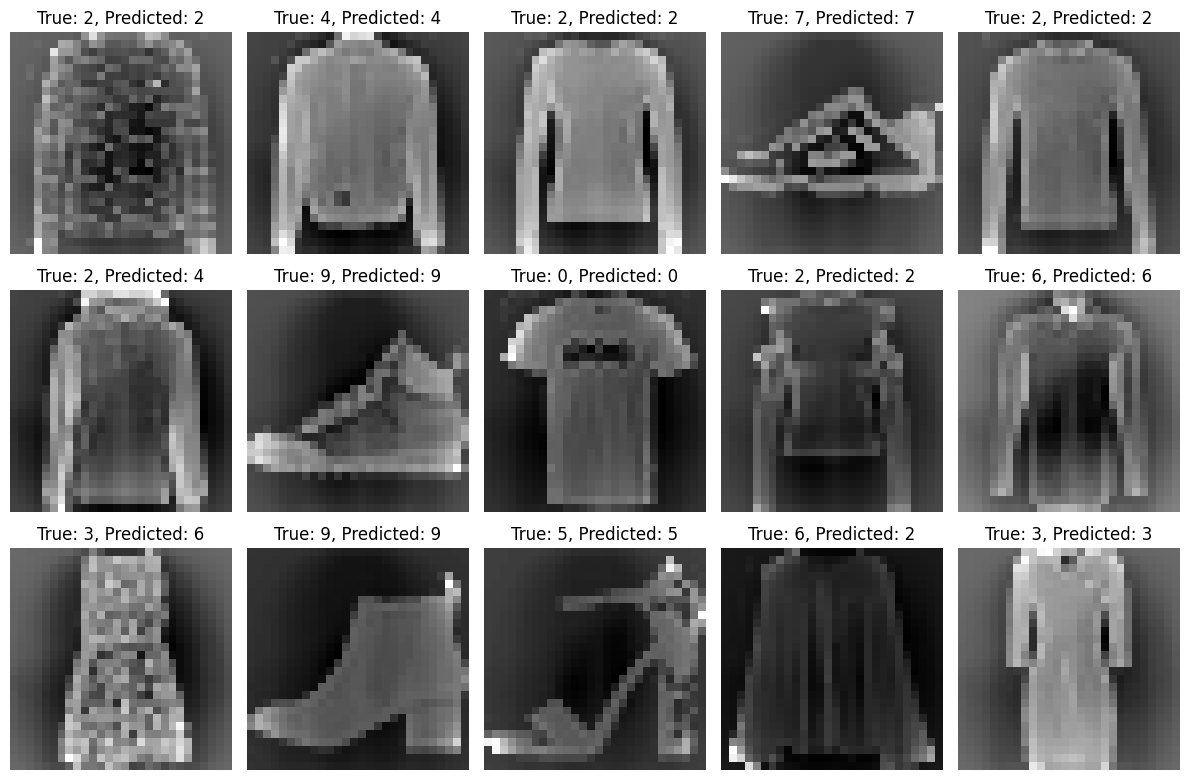

In [ ]:
# Rastgele birkaç örnek görüntüyü görselleştirme
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for i, ax in enumerate(axes.ravel()):
    idx = np.random.randint(len(X_train))
    ax.imshow(X_train[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_train[idx]}, Predicted: {train_predictions[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()